<a href="https://colab.research.google.com/github/Gabriel-RG675/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# prompt:  armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define materias de nivel secundario
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Ciudadanía', 'Artes', 'Música']

# Función para generar nombres y apellidos aleatorios (simplificado)
def generar_nombre():
  nombres = ['Juan', 'Ana', 'Pedro', 'Maria', 'Carlos', 'Laura', 'Diego', 'Sofia', 'Martin', 'Valentina']
  apellidos = ['Gomez', 'Rodriguez', 'Perez', 'Lopez', 'Garcia', 'Martinez', 'Sanchez', 'Diaz', 'Romero', 'Torres']
  return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Crear DataFrame
data = []
for i in range(100):
    nombre_completo = generar_nombre()
    dni = np.random.randint(10000000, 99999999)
    for materia in materias:
        nota1 = np.random.randint(1, 11)  # Nota del 1 al 10
        nota2 = np.random.randint(1, 11)
        nota3 = np.random.randint(1, 11)
        faltas = np.random.randint(0, 20)
        data.append([nombre_completo, dni, materia, nota1, nota2, nota3, faltas])

df = pd.DataFrame(data, columns=['Apellido y Nombre', 'Nro_DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

df

,Apellido y Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Maria Romero,73211635,Matemática,2,4,9,6
1,Maria Romero,73211635,Lengua y Literatura,5,8,8,5
2,Maria Romero,73211635,Historia,6,5,1,7
3,Maria Romero,73211635,Geografía,8,3,10,6
4,Maria Romero,73211635,Ciencias Naturales,7,8,2,10
...,...,...,...,...,...,...,...
995,Valentina Sanchez,90263624,Educación Física,8,8,1,12
996,Valentina Sanchez,90263624,Inglés,3,9,2,0
997,Valentina Sanchez,90263624,Ciudadanía,10,10,6,6
998,Valentina Sanchez,90263624,Artes,7,9,1,6


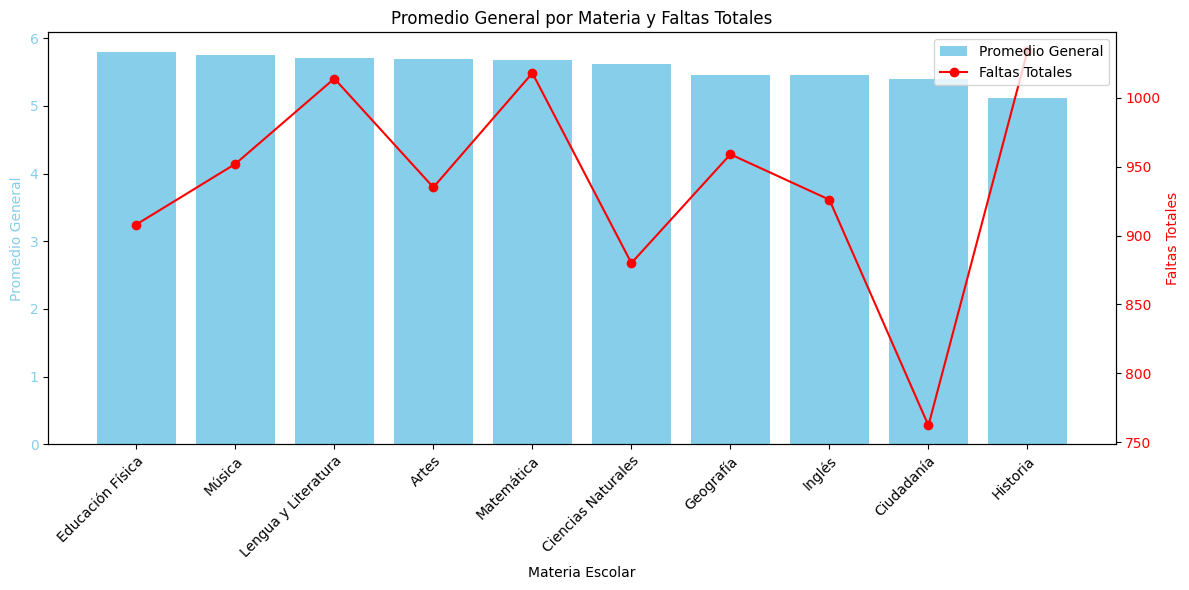

In [8]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average grade for each subject
average_grades = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia Escolar')['Faltas a clases'].sum()


# Sort subjects by average grade in descending order
sorted_subjects = average_grades.sort_values(ascending=False)

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(sorted_subjects.index, sorted_subjects.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General por Materia y Faltas Totales')


# Create a secondary axis for absences
ax2 = ax1.twinx()
ax2.plot(sorted_subjects.index, total_absences[sorted_subjects.index], color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [9]:
df.to_csv("datos_alumnos.csv", index=False)